# Data exploration

Fisch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BASE_PATH = "../../data/"

In [2]:
def get_HITL(path="data/HardwareInTheLoop/", small=False):
    """
    Loads the HITL dataset from the given path.
    :param path: Path to the HITL dataset.
    :param smaller: Whether to load a 1/100th of the HITL dataset.
    :returns: Dictionary with the following keys:
        - network_dataset_attack: List of the three attack network datasets. (~ 5M rows each)
        - network_dataset_normal: Normal network dataset. (~ 7M rows)
        - physical_dataset_attack: List of the three attack physical datasets. (~ 3000 rows each)
        - physical_dataset_normal: Normal physical dataset. (~ 3000 rows)
    """

    skiprows = lambda x: x % 100 != 0 if small else None
    res = {}

    # Network dataset
    network_dataset = []
    for i in range(1, 4):
        network_dataset.append(pd.read_csv(path + "Network datatset/csv/attack_" + str(i) + ".csv", skiprows=skiprows))
    
    res["network_dataset_attack"] = network_dataset
    res["network_dataset_normal"] = pd.read_csv(path + "Network datatset/csv/normal.csv", skiprows=skiprows)

    # Physical dataset
    physical_dataset = []
    for i in range(1, 4):
        physical_dataset.append(pd.read_csv(path + "Physical dataset/phy_att_" + str(i) + ".csv", skiprows=skiprows, sep=";"))
    
    res["physical_dataset_attack"] = physical_dataset
    res["physical_dataset_normal"] = pd.read_csv(path + "Physical dataset/phy_norm.csv", skiprows=skiprows, sep=";")

    return res

def get_SWT(path="data/SecureWaterTreatment/", small=False):
    """
    Loads the SWT dataset from the given path.
    :param path: Path to the SWT dataset.
    :param small: Whether to load a 1/100th of the SWT dataset.
    :returns: List of the four SWT datasets.
              Shapes: (14400, 82), (3600, 82), (7201, 16382), (7201, 61)
    """
    res = []
    skiprows = lambda x: x % 100 != 0 if small else None
    res.append(pd.read_excel(path + "22June2020 (1).xlsx", skiprows=skiprows))
    res.append(pd.read_excel(path + "22June2020 (2).xlsx", skiprows=skiprows))
    res.append(pd.read_excel(path + "29June2020 (1).xlsx", skiprows=skiprows))
    res.append(pd.read_excel(path + "29June2020 (2).xlsx", skiprows=skiprows))

    return res

## HITL dataset

### Data loading


In [3]:
df_htil = get_HITL(BASE_PATH + "HardwareInTheLoop/", small=True)
df_htil

{'network_dataset_attack': [                             Time              mac_s              mac_d  \
  0      2021-04-09 18:23:28.430018  74:46:a0:bd:a7:1b  e6:3f:ac:c9:a8:8c   
  1      2021-04-09 18:23:28.475587  e6:3f:ac:c9:a8:8c  74:46:a0:bd:a7:1b   
  2      2021-04-09 18:23:28.523120  74:46:a0:bd:a7:1b  fa:00:bc:90:d7:fa   
  3      2021-04-09 18:23:28.568588  fa:00:bc:90:d7:fa  74:46:a0:bd:a7:1b   
  4      2021-04-09 18:23:28.617394  e6:3f:ac:c9:a8:8c  74:46:a0:bd:a7:1b   
  ...                           ...                ...                ...   
  55269  2021-04-09 19:03:46.964159  fe:bb:16:7b:c3:27  fa:00:bc:90:d7:fa   
  55270  2021-04-09 19:03:47.145235  74:46:a0:bd:a7:1b  0a:fe:ec:47:74:fb   
  55271  2021-04-09 19:03:47.332925  e6:3f:ac:c9:a8:8c  74:46:a0:bd:a7:1b   
  55272  2021-04-09 19:03:47.504566  74:46:a0:bd:a7:1b  00:80:f4:03:fb:12   
  55273  2021-04-09 19:03:47.645645  fa:00:bc:90:d7:fa  74:46:a0:bd:a7:1b   
  
                 ip_s          ip_d    sport   

In [4]:
print(df_htil["network_dataset_attack"][0].columns)
print(df_htil["network_dataset_normal"].columns)
print(df_htil["physical_dataset_attack"][0].columns)
print(df_htil["physical_dataset_normal"].columns)

Index(['Time', ' mac_s', ' mac_d', ' ip_s', ' ip_d', ' sport', ' dport',
       ' proto', ' flags', ' size', ' modbus_fn', ' n_pkt_src', ' n_pkt_dst',
       ' modbus_response', ' label_n', ' label'],
      dtype='object')
Index(['Time', 'mac_s', 'mac_d', 'ip_s', 'ip_d', 'sport', 'dport', 'proto',
       'flags', 'size', 'modbus_fn', 'n_pkt_src', 'n_pkt_dst',
       'modbus_response', 'label_n', 'label'],
      dtype='object')
Index(['Time', 'Tank_1', 'Tank_2', 'Tank_3', 'Tank_4', 'Tank_5', 'Tank_6',
       'Tank_7', 'Tank_8', 'Pump_1', 'Pump_2', 'Pump_3', 'Pump_4', 'Pump_5',
       'Pump_6', 'Flow_sensor_1', 'Flow_sensor_2', 'Flow_sensor_3',
       'Flow_sensor_4', 'Valv_1', 'Valv_2', 'Valv_3', 'Valv_4', 'Valv_5',
       'Valv_6', 'Valv_7', 'Valv_8', 'Valv_9', 'Valv_10', 'Valv_11', 'Valv_12',
       'Valv_13', 'Valv_14', 'Valv_15', 'Valv_16', 'Valv_17', 'Valv_18',
       'Valv_19', 'Valv_20', 'Valv_21', 'Valv_22', 'Label_n', 'Label'],
      dtype='object')
Index(['Time', 'Tank_1', 'Ta

In [5]:
df_htil["network_dataset_attack"] = [df_htil["network_dataset_attack"][i].rename(columns=lambda x: x.strip()) for i in range(3)]
print(df_htil["network_dataset_attack"][0].columns)

Index(['Time', 'mac_s', 'mac_d', 'ip_s', 'ip_d', 'sport', 'dport', 'proto',
       'flags', 'size', 'modbus_fn', 'n_pkt_src', 'n_pkt_dst',
       'modbus_response', 'label_n', 'label'],
      dtype='object')


In [6]:
df_htil_network = pd.concat(df_htil["network_dataset_attack"] + [df_htil["network_dataset_normal"]])
df_htil_network.head()

,Time,mac_s,mac_d,ip_s,ip_d,sport,dport,proto,flags,size,modbus_fn,n_pkt_src,n_pkt_dst,modbus_response,label_n,label
0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,56666.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
1,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,502.0,56666.0,Modbus,11000.0,64,Read Coils Response,15.0,50.0,[0],0,normal
2,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,56668.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
3,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,502.0,56668.0,Modbus,11000.0,65,Read Holding Registers Response,15.0,50.0,[0],0,normal
4,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,502.0,56666.0,Modbus,11000.0,65,Read Holding Registers Response,15.0,50.0,[0],0,normal


In [7]:
df_htil["physical_dataset_attack"][1].rename({"Lable_n": "Label_n"}, axis=1, inplace=True)

In [8]:
df_htil_physical = pd.concat(df_htil["physical_dataset_attack"] + [df_htil["physical_dataset_normal"]])
df_htil_physical.head()

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,Label_n,Label
0,09/04/2021 18:25,1501,1844,306,0,522,0,0,0,False,...,False,False,True,False,False,False,False,False,0,normal
1,09/04/2021 18:26,1,552,1180,1054,486,329,0,0,False,...,True,False,True,False,False,True,False,False,1,MITM
2,09/04/2021 18:28,671,3,360,24,0,703,112,0,False,...,False,False,False,False,False,False,False,False,0,normal
3,09/04/2021 18:30,1167,1922,112,24,805,20,458,337,False,...,False,False,True,False,False,False,False,False,0,normal
4,09/04/2021 18:31,1,4,1632,785,423,6,458,402,False,...,True,False,False,False,False,True,False,False,0,normal


In [9]:
len(df_htil_physical)

91

The physical dataset contains very fews rows due to get 1/100 rows. Let's get the full dataset, it is not as big as the network dataset.

In [10]:
df_htil_big = get_HITL(BASE_PATH + "HardwareInTheLoop/", small=False)

In [11]:
df_htil_big["physical_dataset_attack"][1].rename({"Lable_n": "Label_n"}, axis=1, inplace=True)
df_htil_physical = pd.concat(df_htil_big["physical_dataset_attack"] + [df_htil_big["physical_dataset_normal"]])
df_htil_physical.rename({"Label_n": "label_n"}, axis=1, inplace=True)
df_htil_physical

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,label_n,Label
0,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
1,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
2,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
3,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
4,09/04/2021 18:23,0,0,0,0,0,0,0,0,True,...,False,False,False,False,False,False,False,False,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,09/04/2021 12:27,4,1037,7,452,300,432,80,0,True,...,True,False,False,False,False,True,False,False,0,normal
3424,09/04/2021 12:27,3,1059,7,439,296,431,88,0,True,...,True,False,False,False,False,True,False,False,0,normal
3425,09/04/2021 12:27,4,1091,8,429,291,431,96,0,True,...,True,False,False,False,False,True,False,False,0,normal
3426,09/04/2021 12:27,4,1131,8,417,288,421,96,0,True,...,True,False,False,False,False,True,False,False,0,normal


### Data exploration

Numerical columns

In [12]:
df_htil_network.select_dtypes(include=['number']).columns.values.tolist()

['sport', 'dport', 'flags', 'size', 'n_pkt_src', 'n_pkt_dst', 'label_n']

In [13]:
df_htil_physical.select_dtypes(include=['number']).columns.values.tolist()

['Tank_1',
 'Tank_2',
 'Tank_3',
 'Tank_4',
 'Tank_5',
 'Tank_6',
 'Tank_7',
 'Tank_8',
 'Flow_sensor_1',
 'Flow_sensor_2',
 'Flow_sensor_3',
 'Flow_sensor_4',
 'label_n']

Object columns

In [14]:
htil_network_object_cols = df_htil_network.select_dtypes(include=['object']).columns.values.tolist()
htil_network_object_cols

['Time',
 'mac_s',
 'mac_d',
 'ip_s',
 'ip_d',
 'proto',
 'modbus_fn',
 'modbus_response',
 'label']

In [15]:
df_htil_physical.select_dtypes(include=['object']).columns.values.tolist()

['Time', 'Label']

A lot a columns seem to be of another type, let's check them

In [16]:
df_htil_physical.dtypes

Time             object
Tank_1            int64
Tank_2            int64
Tank_3            int64
Tank_4            int64
Tank_5            int64
Tank_6            int64
Tank_7            int64
Tank_8            int64
Pump_1             bool
Pump_2             bool
Pump_3             bool
Pump_4             bool
Pump_5             bool
Pump_6             bool
Flow_sensor_1     int64
Flow_sensor_2     int64
Flow_sensor_3     int64
Flow_sensor_4     int64
Valv_1             bool
Valv_2             bool
Valv_3             bool
Valv_4             bool
Valv_5             bool
Valv_6             bool
Valv_7             bool
Valv_8             bool
Valv_9             bool
Valv_10            bool
Valv_11            bool
Valv_12            bool
Valv_13            bool
Valv_14            bool
Valv_15            bool
Valv_16            bool
Valv_17            bool
Valv_18            bool
Valv_19            bool
Valv_20            bool
Valv_21            bool
Valv_22            bool
label_n         

In [17]:
df_htil_physical.head()

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,label_n,Label
0,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
1,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
2,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
3,09/04/2021 18:23,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,0,normal
4,09/04/2021 18:23,0,0,0,0,0,0,0,0,True,...,False,False,False,False,False,False,False,False,0,normal


The boolean columns are actually numerical, let's convert them to 0/1

In [18]:
bool_cols = df_htil_physical.columns[df_htil_physical.dtypes == bool]
df_htil_physical[bool_cols] = df_htil_physical[bool_cols].astype(int)
df_htil_physical.head()

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,label_n,Label
0,09/04/2021 18:23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
1,09/04/2021 18:23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
2,09/04/2021 18:23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
3,09/04/2021 18:23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
4,09/04/2021 18:23,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,normal


Let's try to get numerical columns again

In [19]:
len(df_htil_physical.select_dtypes(include=['number']).columns.values.tolist())

41

Now all 43 columns are either numerical or categorical for the physical dataset

#### Network dataset

Let's firstly dive into the network dataset

In [20]:
df_htil_network["flags"].value_counts()

flags
11000.0    203007
10000.0      1951
10.0         1256
10010.0       979
10001.0       975
100.0         219
10100.0       177
Name: count, dtype: int64

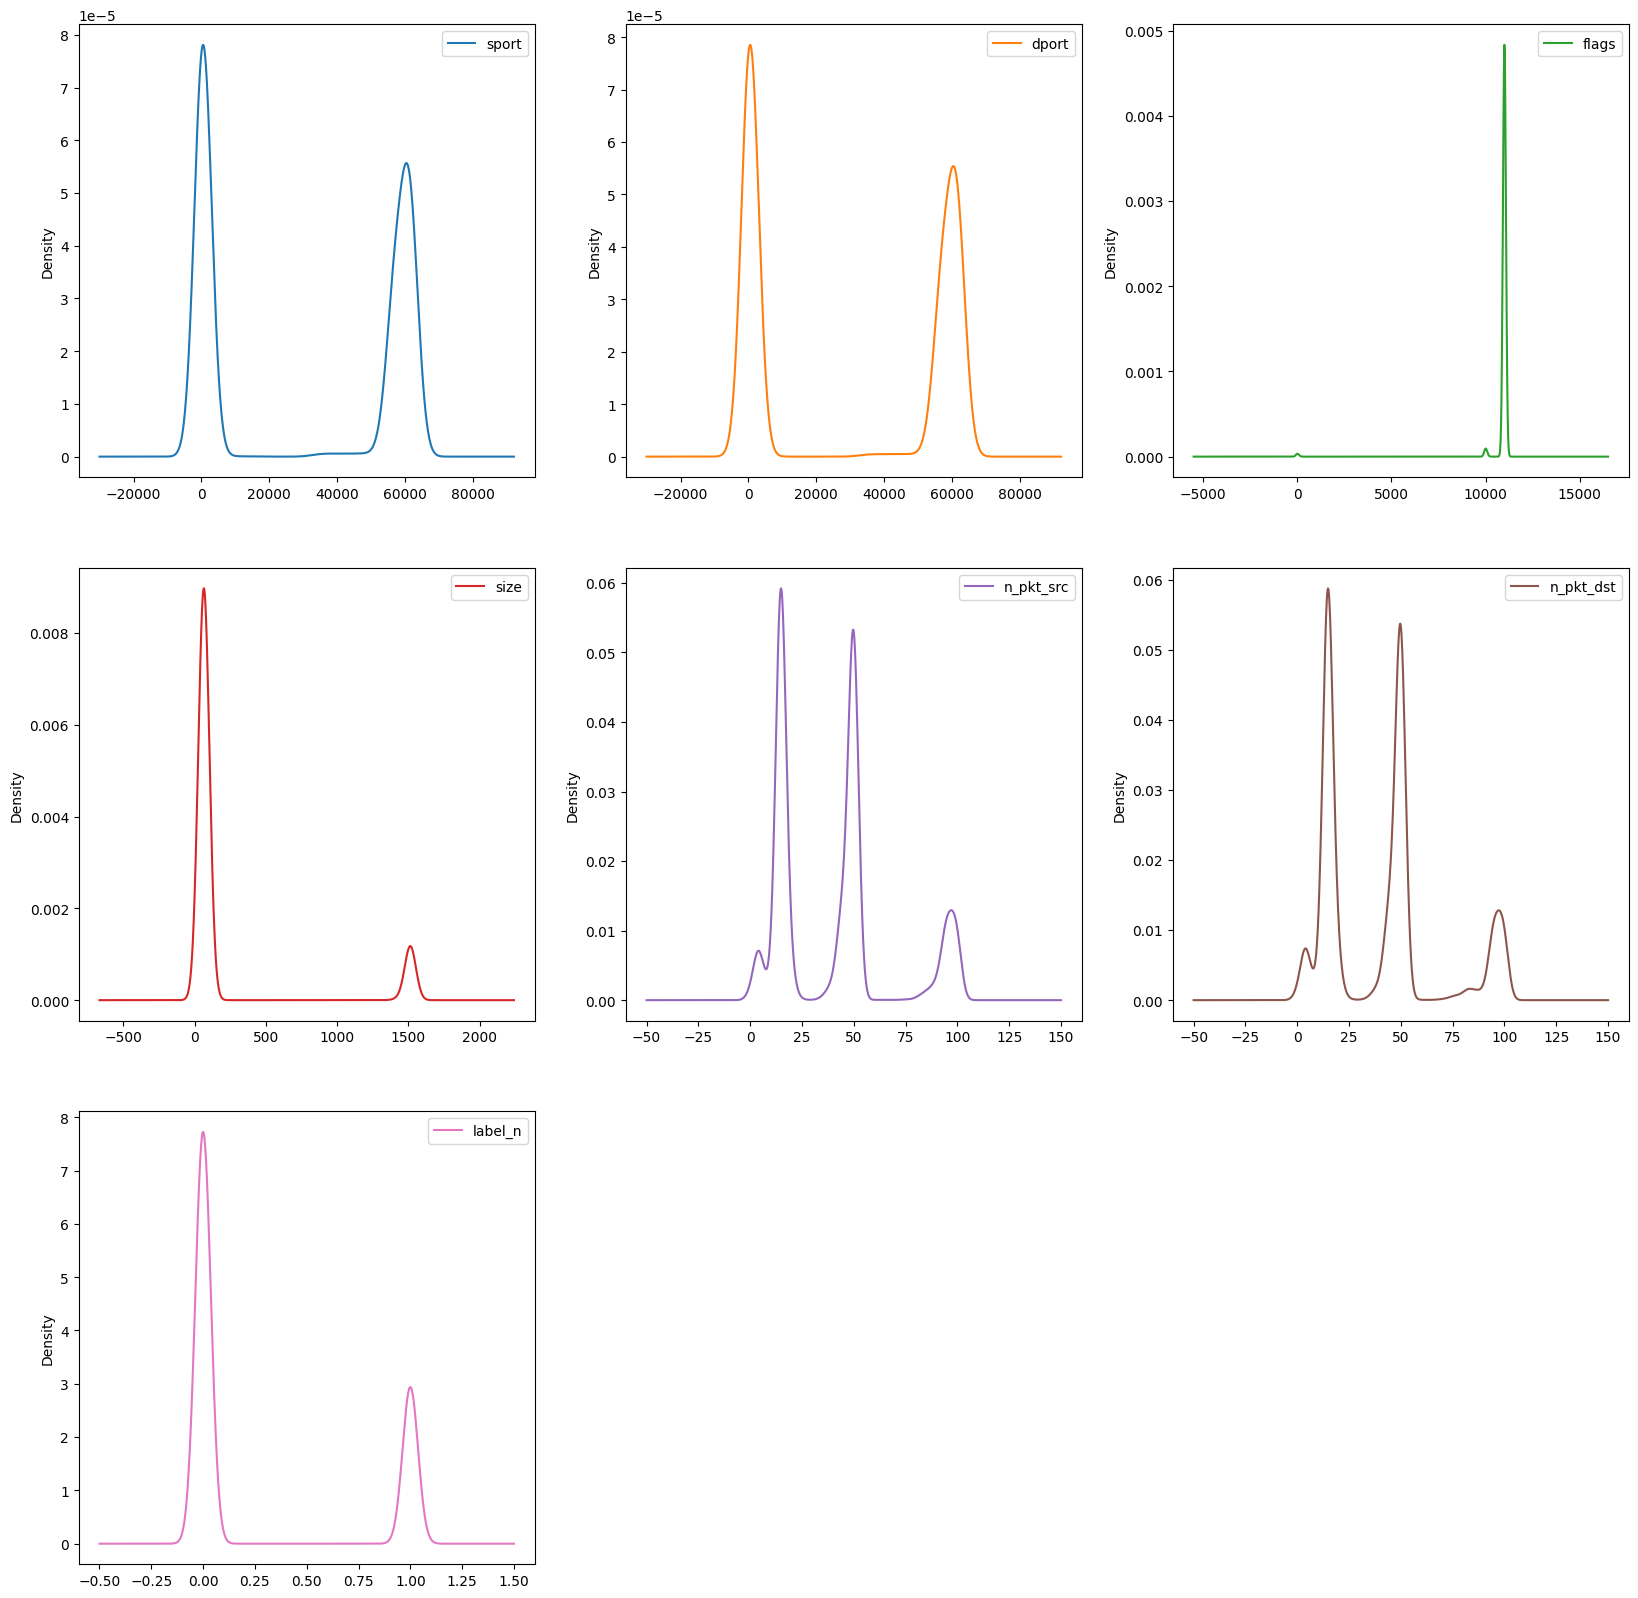

In [21]:
df_htil_network.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20, 20))
plt.show()

Let's quickly analyse the density of the numerical columns:
- `sport` and `dport`: two density spikes around 0 and 60000
- `flags`: a huge spike around 11000 and very few data around 10000 and 0
- `size`: two main spikes, the first one around 60 and the second one is around 1500, but 10x less dense
- `n_pkt_src` and `n_pkt_dst`: closer data with more dominant spikes, the two main ones are around 15 and 50
- `label_n`: 0 or 1, 1 is 2.5x less dense so we have a class imbalance

Let's take a look at the repartition for the categorical columns

In [22]:
df_htil_network["modbus_response"].value_counts()

modbus_response
[0]       61171
[1]        9482
[4000]     4709
[458]       664
[450]       354
          ...  
[1182]        1
[1134]        1
[940]         1
[892]         1
[811]         1
Name: count, Length: 1933, dtype: int64

In [23]:
htil_network_object_cols

['Time',
 'mac_s',
 'mac_d',
 'ip_s',
 'ip_d',
 'proto',
 'modbus_fn',
 'modbus_response',
 'label']

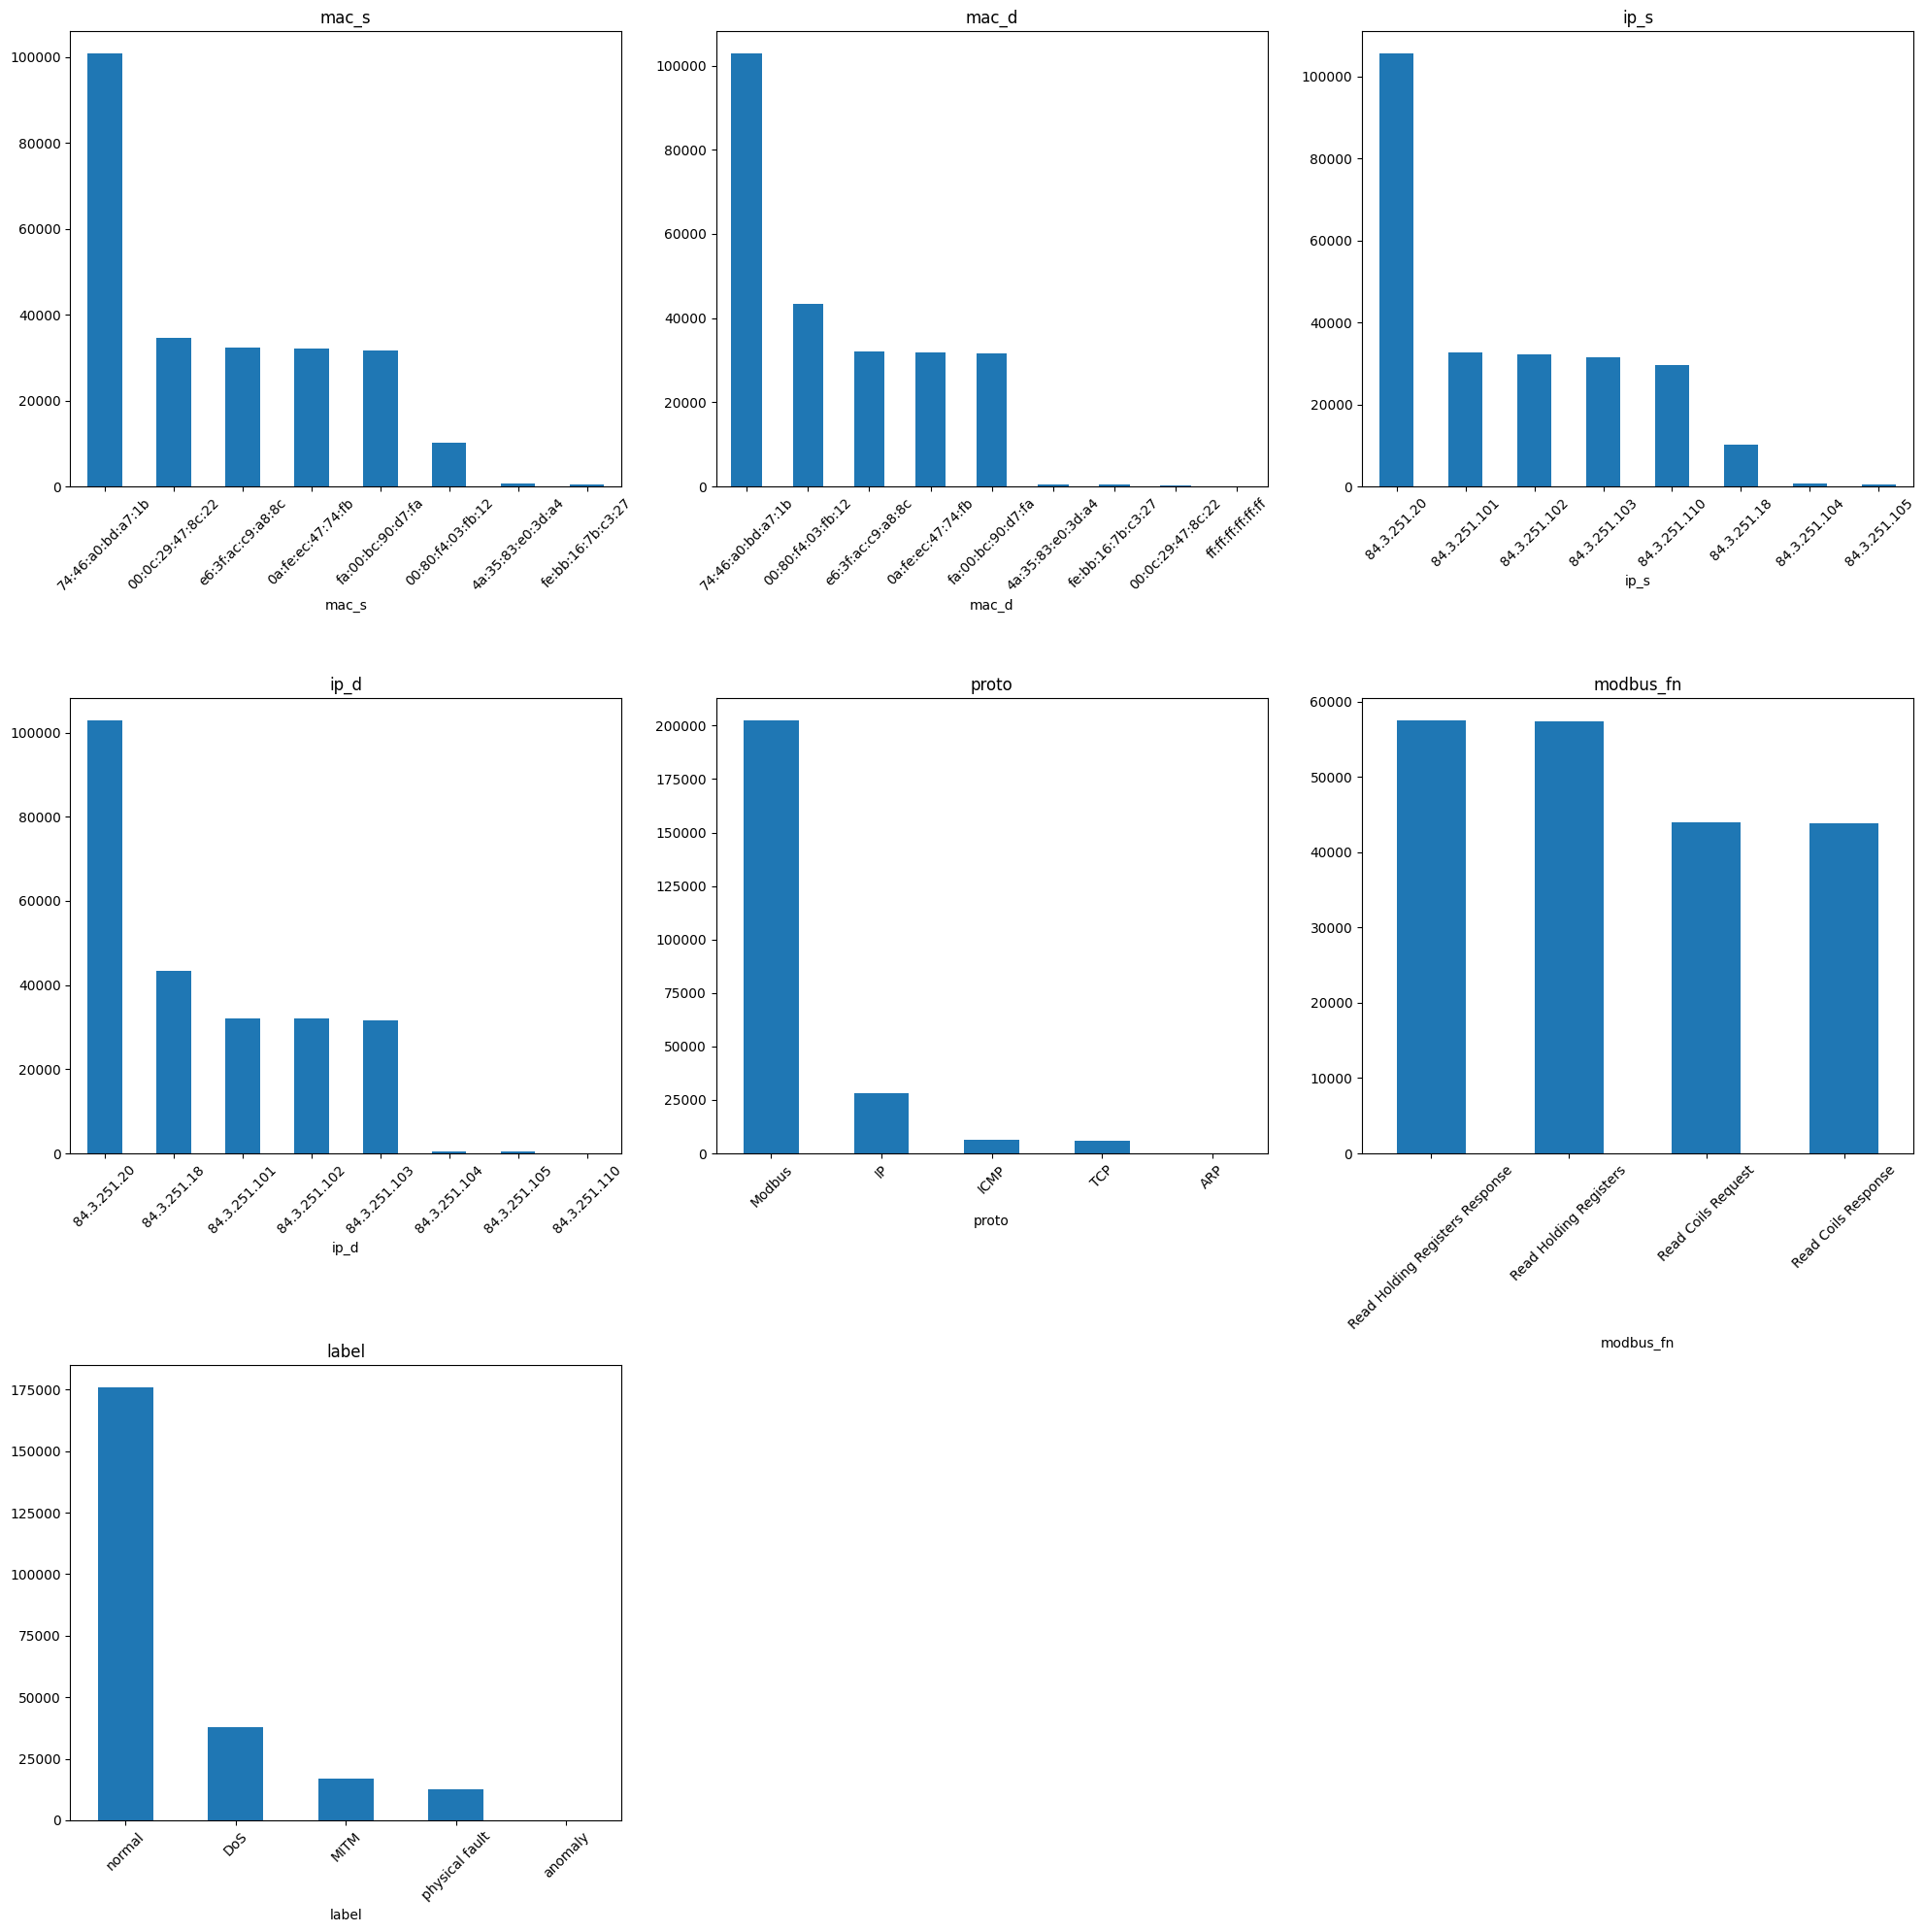

In [24]:
# repartition of categorical features
cols = [col for col in htil_network_object_cols if col not in ["modbus_response", "Time"]]

fig = plt.figure(figsize=(20, 20))
for i, col in enumerate(cols):
    ax = fig.add_subplot(3, 3, i+1)
    df_htil_network[col].value_counts().plot(kind='bar', ax=ax, title=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.tight_layout()
plt.show()

It is hard to deduce anything from the distributions, but we make the following observations:
- the distribution of `mac_s`, `mac_d`, `ip_s` and `ip_d` are very similar: one address is more frequent than the 7 others
- the distribution of `proto` is very unbalanced, with the "Modbus" protocol being 10x more frequent than the others. This column might be irrelevant for the classification
- the distribution of `label` is very unbalanced, but this is expected since we have merged all the attacks datasets with the normal one. Regarding the type of anomalies, there is 2x more "DoS" than "MITM" and "physical fault".
- the `modbus_response` data is very balanced between the 4 values.

Let's try to go a bit deeper and plot the labels as a time series

In [25]:
df_htil_network_sorted = df_htil_network.sort_values(by=["Time"])
df_htil_network_sorted["Time_minute"] = df_htil_network_sorted["Time"].apply(lambda x: x.split(":")[0] + ":" + x.split(":")[1])
df_htil_network_sorted["Time_minute"] = pd.to_datetime(df_htil_network_sorted["Time_minute"], format="%Y-%m-%d %H:%M")
df_htil_network_sorted.head()

,Time,mac_s,mac_d,ip_s,ip_d,sport,dport,proto,flags,size,modbus_fn,n_pkt_src,n_pkt_dst,modbus_response,label_n,label,Time_minute
0,2021-04-09 11:30:52.761572,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,502.0,61516.0,Modbus,11000.0,65,Read Holding Registers Response,15.0,49.0,[0],0,normal,2021-04-09 11:30:00
1,2021-04-09 11:30:52.808170,74:46:a0:bd:a7:1b,0a:fe:ec:47:74:fb,84.3.251.20,84.3.251.102,61517.0,502.0,Modbus,11000.0,66,Read Coils Request,49.0,15.0,NaN,0,normal,2021-04-09 11:30:00
2,2021-04-09 11:30:52.848609,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,502.0,61516.0,Modbus,11000.0,65,Read Holding Registers Response,18.0,43.0,[0],0,normal,2021-04-09 11:30:00
3,2021-04-09 11:30:52.889732,0a:fe:ec:47:74:fb,74:46:a0:bd:a7:1b,84.3.251.102,84.3.251.20,502.0,61517.0,Modbus,11000.0,65,Read Holding Registers Response,18.0,44.0,[0],0,normal,2021-04-09 11:30:00
4,2021-04-09 11:30:52.936601,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,502.0,61515.0,Modbus,11000.0,64,Read Coils Response,15.0,50.0,[0],0,normal,2021-04-09 11:30:00


In [26]:
df_grouped = df_htil_network_sorted.groupby(["Time_minute", 'label_n']).size().unstack().fillna(0)
df_grouped

label_n,0,1
Time_minute,,
2021-04-09 11:30:00,164.0,0.0
2021-04-09 11:31:00,1365.0,0.0
2021-04-09 11:32:00,1362.0,0.0
2021-04-09 11:33:00,1360.0,0.0
2021-04-09 11:34:00,1360.0,0.0
...,...,...
2021-04-19 16:08:00,593.0,772.0
2021-04-19 16:09:00,0.0,1368.0
2021-04-19 16:10:00,1334.0,30.0


Firstly, let's see the number of anormal data per minute for the "normal" dataset

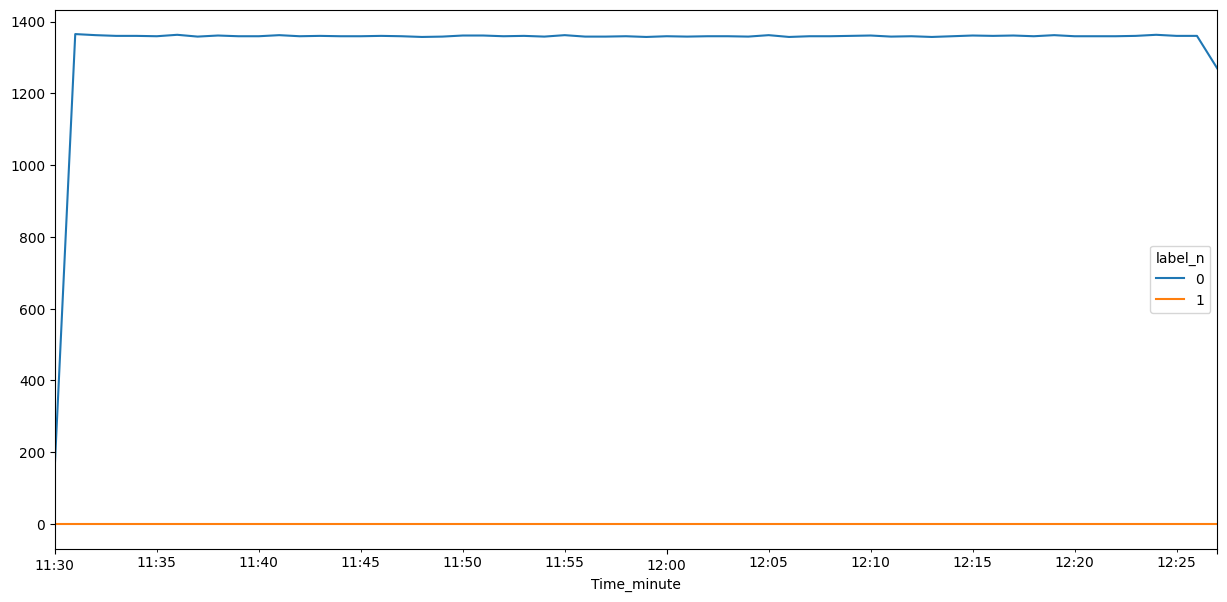

In [27]:
df_grouped.loc["2021-04-09 11":"2021-04-09 13"].plot(figsize=(15, 7))
plt.show()

As expected, there is no 1 label in the normal dataset. Let's check for 2020-04-09 (first day of recorded anomalies)

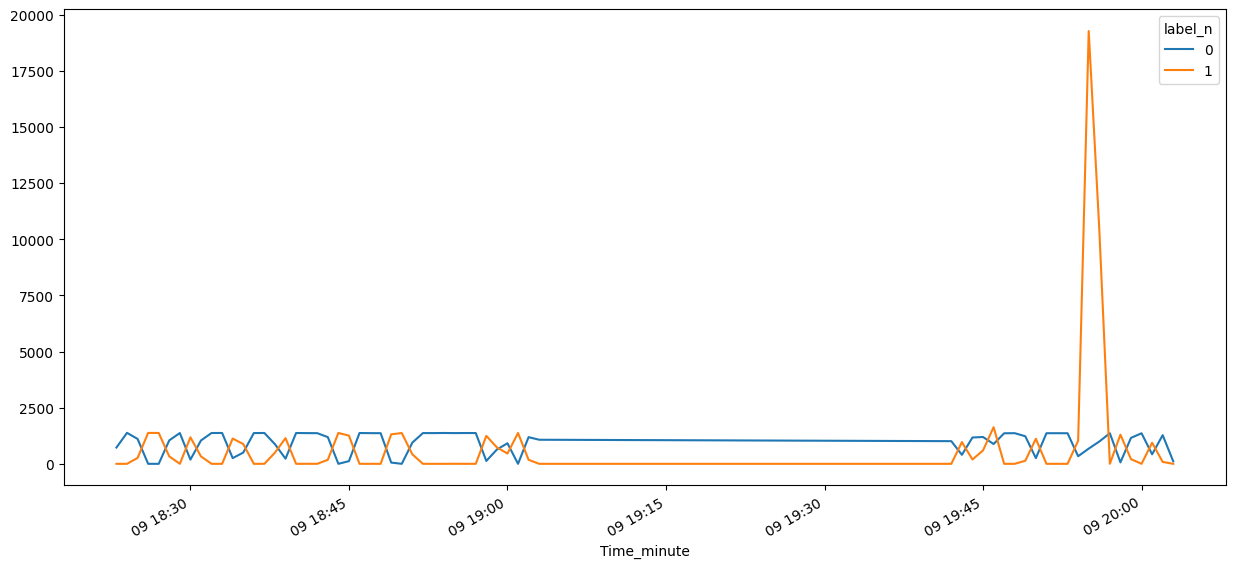

In [28]:
df_grouped.loc["2021-04-09 18":"2021-04-09 22"].plot(figsize=(15, 7))
plt.show()

We see way more fluctuation in the data. There is anormal activity for some time, then it stops, then it starts again with a huge peak

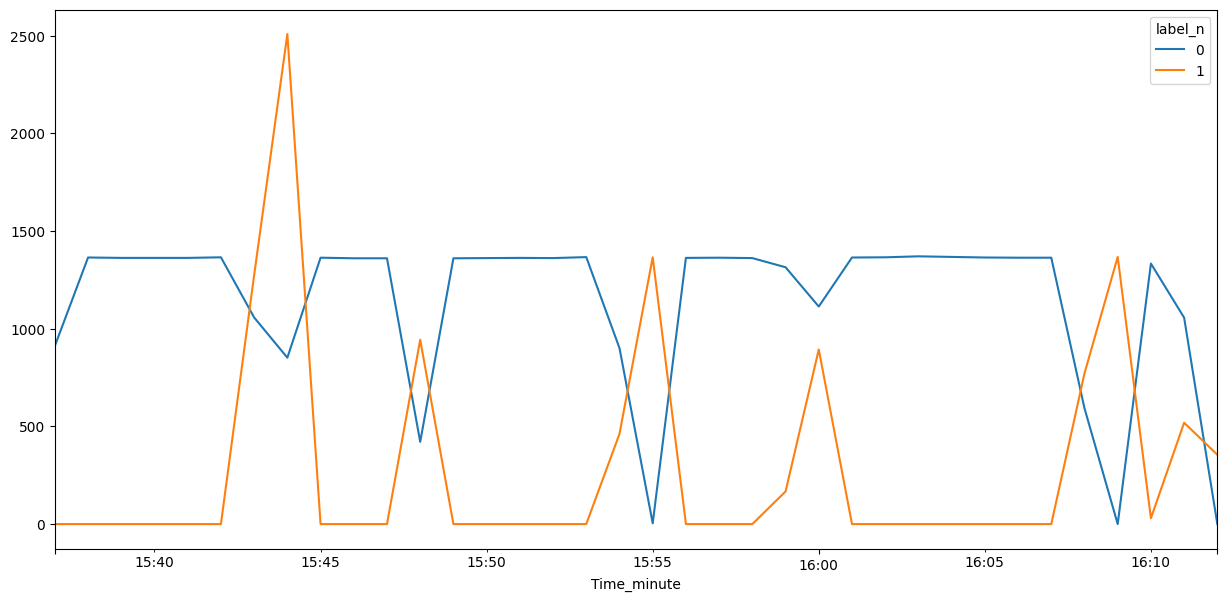

In [29]:
df_grouped.loc["2021-04-19":"2021-04-20"].plot(figsize=(15, 7))
plt.show()

The second day of recorded anomalies show the same pattern, except the spike is not as significant as for the first day

Now, let's take a look at the number of packets sent per minute

In [30]:
df_htil_network

,Time,mac_s,mac_d,ip_s,ip_d,sport,dport,proto,flags,size,modbus_fn,n_pkt_src,n_pkt_dst,modbus_response,label_n,label
0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,56666.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
1,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,502.0,56666.0,Modbus,11000.0,64,Read Coils Response,15.0,50.0,[0],0,normal
2,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,56668.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
3,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,502.0,56668.0,Modbus,11000.0,65,Read Holding Registers Response,15.0,50.0,[0],0,normal
4,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,502.0,56666.0,Modbus,11000.0,65,Read Holding Registers Response,15.0,50.0,[0],0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,2021-04-09 12:27:55.833896,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,61516.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
77568,2021-04-09 12:27:55.878902,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,61516.0,502.0,Modbus,11000.0,66,Read Holding Registers,50.0,15.0,NaN,0,normal
77569,2021-04-09 12:27:55.923833,74:46:a0:bd:a7:1b,0a:fe:ec:47:74:fb,84.3.251.20,84.3.251.102,61517.0,502.0,Modbus,11000.0,66,Read Holding Registers,51.0,14.0,NaN,0,normal
77570,2021-04-09 12:27:55.968791,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,61515.0,502.0,Modbus,11000.0,66,Read Holding Registers,47.0,14.0,NaN,0,normal


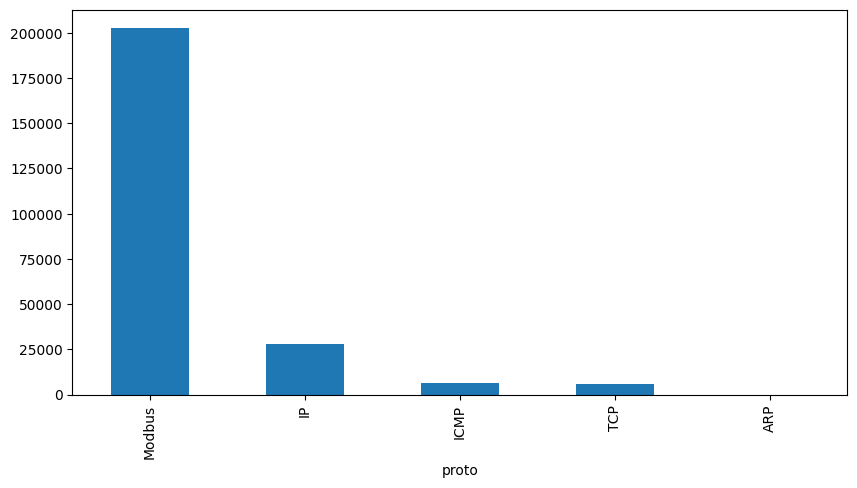

In [31]:
df_htil_network["proto"].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()

## Anomaly detection

### 1. Isolation Forest

#### a. Network dataset

In [32]:
from mlsecu.data_exploration_utils import get_column_names, get_nb_of_dimensions, get_nb_of_rows, get_object_column_names, get_number_column_names
from mlsecu.anomaly_detection_use_case import *
from mlsecu.data_preparation_utils import get_one_hot_encoded_dataframe, remove_nan_through_mean_imputation

Let's just be sure that we are not omitting any important column

In [33]:
assert(len(get_number_column_names(df_htil_network)) + len(get_object_column_names(df_htil_network)) == len(df_htil_network.columns))

In [34]:
df_htil_network[get_number_column_names(df_htil_network)]

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n
0,56666.0,502.0,11000.0,66,50.0,15.0,0
1,502.0,56666.0,11000.0,64,15.0,50.0,0
2,56668.0,502.0,11000.0,66,50.0,15.0,0
3,502.0,56668.0,11000.0,65,15.0,50.0,0
4,502.0,56666.0,11000.0,65,15.0,50.0,0
...,...,...,...,...,...,...,...
77567,61516.0,502.0,11000.0,66,50.0,15.0,0
77568,61516.0,502.0,11000.0,66,50.0,15.0,0
77569,61517.0,502.0,11000.0,66,51.0,14.0,0
77570,61515.0,502.0,11000.0,66,47.0,14.0,0


In [35]:
df_htil_network[get_object_column_names(df_htil_network)]

,Time,mac_s,mac_d,ip_s,ip_d,proto,modbus_fn,modbus_response,label
0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,NaN,normal
1,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Coils Response,[0],normal
2,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN,normal
3,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
4,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
...,...,...,...,...,...,...,...,...,...
77567,2021-04-09 12:27:55.833896,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN,normal
77568,2021-04-09 12:27:55.878902,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,NaN,normal
77569,2021-04-09 12:27:55.923833,74:46:a0:bd:a7:1b,0a:fe:ec:47:74:fb,84.3.251.20,84.3.251.102,Modbus,Read Holding Registers,NaN,normal
77570,2021-04-09 12:27:55.968791,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,NaN,normal


##### Remove NaN values for both numerical and categorical columns

In [36]:
df_number_network = remove_nan_through_mean_imputation(df_htil_network[get_number_column_names(df_htil_network)])
df_number_network

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n
0,56666.0,502.0,11000.0,66,50.0,15.0,0
1,502.0,56666.0,11000.0,64,15.0,50.0,0
2,56668.0,502.0,11000.0,66,50.0,15.0,0
3,502.0,56668.0,11000.0,65,15.0,50.0,0
4,502.0,56666.0,11000.0,65,15.0,50.0,0
...,...,...,...,...,...,...,...
77567,61516.0,502.0,11000.0,66,50.0,15.0,0
77568,61516.0,502.0,11000.0,66,50.0,15.0,0
77569,61517.0,502.0,11000.0,66,51.0,14.0,0
77570,61515.0,502.0,11000.0,66,47.0,14.0,0


The two categorical columns with NaN values are `modbus_response` and `modbus_fn`. Let's replace the NaN values with empty strings

In [37]:
df_object_network = df_htil_network[get_object_column_names(df_htil_network)].fillna("")
df_object_network

,Time,mac_s,mac_d,ip_s,ip_d,proto,modbus_fn,modbus_response,label
0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,,normal
1,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Coils Response,[0],normal
2,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,,normal
3,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
4,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
...,...,...,...,...,...,...,...,...,...
77567,2021-04-09 12:27:55.833896,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,,normal
77568,2021-04-09 12:27:55.878902,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,,normal
77569,2021-04-09 12:27:55.923833,74:46:a0:bd:a7:1b,0a:fe:ec:47:74:fb,84.3.251.20,84.3.251.102,Modbus,Read Holding Registers,,normal
77570,2021-04-09 12:27:55.968791,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,,normal


##### Encode categorical columns

For each categorical column, let's one-hot encode them

Merge the two sub-datasets

In [38]:
df_htil_network_prepared = pd.concat([df_number_network, df_object_network], axis=1)
df_htil_network_prepared.head()

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n,Time,mac_s,mac_d,ip_s,ip_d,proto,modbus_fn,modbus_response,label
0,56666.0,502.0,11000.0,66,50.0,15.0,0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,,normal
1,502.0,56666.0,11000.0,64,15.0,50.0,0,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Coils Response,[0],normal
2,56668.0,502.0,11000.0,66,50.0,15.0,0,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,,normal
3,502.0,56668.0,11000.0,65,15.0,50.0,0,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
4,502.0,56666.0,11000.0,65,15.0,50.0,0,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal


In [39]:
df_htil_network_prepared.reset_index(drop=True, inplace=True)

In [40]:
# convert time column to timestamp, add 0 to nanoseconds if not present
df_htil_network_prepared["Time"] = df_htil_network_prepared["Time"].apply(lambda x: x + ".000000" if len(x.split(".")) == 1 else x)
df_htil_network_prepared["Time"] = pd.to_datetime(df_htil_network_prepared["Time"], format="%Y-%m-%d %H:%M:%S.%f")
df_htil_network_prepared.head()

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n,Time,mac_s,mac_d,ip_s,ip_d,proto,modbus_fn,modbus_response,label
0,56666.0,502.0,11000.0,66,50.0,15.0,0,2021-04-09 18:23:28.430018,74:46:a0:bd:a7:1b,e6:3f:ac:c9:a8:8c,84.3.251.20,84.3.251.101,Modbus,Read Holding Registers,,normal
1,502.0,56666.0,11000.0,64,15.0,50.0,0,2021-04-09 18:23:28.475587,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Coils Response,[0],normal
2,56668.0,502.0,11000.0,66,50.0,15.0,0,2021-04-09 18:23:28.523120,74:46:a0:bd:a7:1b,fa:00:bc:90:d7:fa,84.3.251.20,84.3.251.103,Modbus,Read Holding Registers,,normal
3,502.0,56668.0,11000.0,65,15.0,50.0,0,2021-04-09 18:23:28.568588,fa:00:bc:90:d7:fa,74:46:a0:bd:a7:1b,84.3.251.103,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal
4,502.0,56666.0,11000.0,65,15.0,50.0,0,2021-04-09 18:23:28.617394,e6:3f:ac:c9:a8:8c,74:46:a0:bd:a7:1b,84.3.251.101,84.3.251.20,Modbus,Read Holding Registers Response,[0],normal


In [41]:
df_htil_network_prepared["Time"] = df_htil_network_prepared["Time"].apply(lambda x: x.timestamp())

In [42]:
# one hot encoding of categorical features
one_hot_df = get_one_hot_encoded_dataframe(df_htil_network_prepared[get_object_column_names(df_htil_network_prepared)])

# merge one hot encoded categorical features with numerical features
df_htil_network_prepared = pd.concat([df_htil_network_prepared[get_number_column_names(df_htil_network_prepared)], one_hot_df], axis=1)
df_htil_network_prepared.head()

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n,Time,mac_s_00:0c:29:47:8c:22,mac_s_00:80:f4:03:fb:12,...,modbus_response_[994],modbus_response_[995],modbus_response_[999],modbus_response_[99],modbus_response_[9],label_DoS,label_MITM,label_anomaly,label_normal,label_physical fault
0,56666.0,502.0,11000.0,66,50.0,15.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
1,502.0,56666.0,11000.0,64,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
2,56668.0,502.0,11000.0,66,50.0,15.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
3,502.0,56668.0,11000.0,65,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
4,502.0,56666.0,11000.0,65,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
clf = IsolationForest(random_state=42)
y_pred = clf.fit_predict(df_htil_network_prepared)
if_outliers = df_htil_network_prepared[y_pred == -1].index.values.tolist()
len(if_outliers)

14973

In [44]:
df_htil_network_prepared.iloc[if_outliers]["label_n"].value_counts()

label_n
1    10591
0     4382
Name: count, dtype: int64

Out of the 14973 outliers found, 10591 are real anomalies (70.7%). This is a good result, but let's see if we can do better with less estimators

In [46]:
clf = IsolationForest(n_estimators=15, n_jobs=-1, bootstrap=True, random_state=42)
y_pred = clf.fit_predict(df_htil_network_prepared)
if_outliers_200 = df_htil_network_prepared[y_pred == -1].index.values.tolist()
len(if_outliers_200)

23461

In [47]:
df_htil_network_prepared.iloc[if_outliers_200]["label_n"].value_counts()

label_n
1    19256
0     4205
Name: count, dtype: int64

Using only 15 estimators, we extract 23461 outliers, 19256 of which are real anomalies (82.1%). This is a better result, but we have 1.6x more outliers

Let's try to use a smaller dataset with controlle anomaly rate

In [48]:
df_normal = df_htil_network_prepared[df_htil_network_prepared["label_n"] == 0][:48000]
df_attack = df_htil_network_prepared[df_htil_network_prepared["label_n"] == 1][:2000]
df_htil_network_reduced = pd.concat([df_normal, df_attack])
df_htil_network_reduced.head()

,sport,dport,flags,size,n_pkt_src,n_pkt_dst,label_n,Time,mac_s_00:0c:29:47:8c:22,mac_s_00:80:f4:03:fb:12,...,modbus_response_[994],modbus_response_[995],modbus_response_[999],modbus_response_[99],modbus_response_[9],label_DoS,label_MITM,label_anomaly,label_normal,label_physical fault
0,56666.0,502.0,11000.0,66,50.0,15.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
1,502.0,56666.0,11000.0,64,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
2,56668.0,502.0,11000.0,66,50.0,15.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
3,502.0,56668.0,11000.0,65,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False
4,502.0,56666.0,11000.0,65,15.0,50.0,0,1.617993e+09,False,False,...,False,False,False,False,False,False,False,False,True,False


In [49]:
contamination_rate = 2000 / 50000
clf = IsolationForest(random_state=42, contamination=contamination_rate, n_jobs=-1, n_estimators=10)
y_pred = clf.fit_predict(df_htil_network_reduced)
if_outliers = df_htil_network_reduced[y_pred == -1].index.values.tolist()
len(if_outliers)

1999

In [50]:
df_htil_network_reduced.loc[if_outliers]["label_n"].value_counts()

label_n
0    1645
1     354
Name: count, dtype: int64

Results are not as good as with the full dataset, they are even really bad.

#### b. Physical dataset

In [51]:
df_number_physical = remove_nan_through_mean_imputation(df_htil_physical[get_number_column_names(df_htil_physical)])
df_number_physical.head()

,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,Pump_2,...,Valv_14,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,label_n
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_object_physical = df_htil_physical[get_object_column_names(df_htil_physical)].fillna("")
df_htil_physical_prepared = pd.concat([df_number_physical, df_object_physical], axis=1)

In [53]:
df_htil_physical_prepared["Time"] = df_htil_physical_prepared["Time"].apply(lambda x: x + ":00" if len(x.split(":")) == 2 else x)
df_htil_physical_prepared["Time"] = pd.to_datetime(df_htil_physical_prepared["Time"], format="%d/%m/%Y %H:%M:%S")
df_htil_physical_prepared["Time"] = df_htil_physical_prepared["Time"].apply(lambda x: x.timestamp())
df_htil_physical_prepared.head()

,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,Pump_2,...,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,label_n,Time,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.617993e+09,normal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.617993e+09,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.617993e+09,normal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.617993e+09,normal
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.617993e+09,normal


In [54]:
# one hot encoding of categorical features
one_hot_df = get_one_hot_encoded_dataframe(df_htil_physical_prepared[get_object_column_names(df_htil_physical_prepared)])

# merge one hot encoded categorical features with numerical features
df_htil_physical_prepared = pd.concat([df_htil_physical_prepared[get_number_column_names(df_htil_physical_prepared)], one_hot_df], axis=1)
df_htil_physical_prepared.reset_index(drop=True, inplace=True)

In [55]:
clf = IsolationForest(random_state=42, n_jobs=-1, n_estimators=20)
y_pred = clf.fit_predict(df_htil_physical_prepared)
if_outliers = df_htil_physical_prepared[y_pred == -1].index.values.tolist()
len(if_outliers)

4426

In [56]:
df_htil_physical_prepared.loc[if_outliers]["label_n"].value_counts()

label_n
0    2967
1    1459
Name: count, dtype: int64

### 2.Local Outlier Factor

#### a. Network dataset

In [61]:
clf = LocalOutlierFactor(n_neighbors=5)
y_pred = clf.fit_predict(df_htil_network_prepared)
lof_outliers = df_htil_network_prepared[y_pred == -1].index.values.tolist()
len(lof_outliers)

922

In [63]:
df_htil_network_prepared.loc[lof_outliers]["label_n"].value_counts()

label_n
0    692
1    230
Name: count, dtype: int64

LOF has poor results

#### b. Physical dataset

In [59]:
clf = LocalOutlierFactor(n_neighbors=10)
y_pred = clf.fit_predict(df_htil_physical_prepared)
lof_outliers = df_htil_physical_prepared[y_pred == -1].index.values.tolist()
len(lof_outliers)

89

In [60]:
df_htil_physical_prepared.loc[lof_outliers]["label_n"].value_counts()

label_n
0    67
1    22
Name: count, dtype: int64